In [7]:
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import uproot
import hist


In [8]:
# HEPHY topside
x = np.arange(60, 86) #thr 
x = np.arange(174, 186) #HV 190-25
x = np.concatenate((np.arange(174, 176),np.arange(177, 180),np.arange(181, 186))) #HV gefiltert

# HEPHY backside
x = np.arange(206, 231) #thr 
x = np.arange(234, 248) #HV 200-5
x = np.arange(251, 256) #HV 450-250
x = np.arange(271, 280) #HV 10-2
x = np.concatenate((np.arange(234, 248), np.arange(251, 256), np.arange(271, 280))) #HV all

# NIKHEF backside
x = np.arange(308, 318) #HV 20-2
x = np.arange(322, 332) #HV 500-50
x = np.concatenate((np.arange(308, 318), np.arange(322, 332))) #HV all

# Liverpool topside
x = np.arange(342, 367) #thr
x = np.arange(372, 466) #HV 500-50
x = np.concatenate((np.arange(372, 410), np.arange(411, 437), np.arange(438, 466))) #HV 500-50 ohne error

# NIKHEF backside_top
x = np.arange(495, 507) #thr
x = np.arange(468, 480) #HV 190-80
x = np.arange(480, 494) #HV 70-5
x = np.concatenate((np.arange(468, 480), np.arange(480, 494))) #HV all



In [9]:
# Use glob to find all files matching the pattern 'hv_vs_effi/logs/*log*.txt'
logs = glob.glob('logfiles_old/*.log')

# Initialize a dictionary 'effis' to store efficiency-related data
effis = {'Efficiency': [], 'Err+': [], 'Err-':[], 'Bias':[], 'Chip':[], 'Threshold':[]}
run_map_file = '/home/harald/Desktop/MPW4/desy_04_24/all_data.csv'
run_map = {}

output_file = '/home/harald/Desktop/MPW4/desy_04_24/plots/effi_vs_threshold.png'
plot_title = 'Efficiency vs. Threshold'
x_label ='Threshold [mV]'
plot_title = "Efficiency vs. Threshold"
second_x_axis = True


# output_file = '/home/harald/Desktop/MPW4/desy_04_24/plots/effi_vs_bias.png'
# plot_title = 'Efficiency vs. Bias'
# x_label ='Bias [V]'
# plot_title = "Efficiency vs. Bias voltage"
# second_x_axis = False



list1 = np.arange(60, 86)
name1 = "Topside biased"

list2 = np.arange(206, 231)
name2 = "Backside biased"
border = list1[-1] +1

font_size = 30

runs_to_analyse = np.concatenate((list1, list2))

logs.sort()
filesToRemove = []
for r in logs:
    match = re.search(r'analysis_jobsub_(\d+)', r)
    if match:
        runNmb = int(match.group(1))
        if not (runNmb in runs_to_analyse):
            filesToRemove.append(r)
    else:
        filesToRemove.append(r)

for f in filesToRemove:
    logs.remove(f)

with open(run_map_file) as f:
    for line in f:
        if line.startswith('#'):
            continue
        run, para = line.split(',')
        run = int(run)
        para = abs(float(para))
        run_map[run] = para

#run_map



In [12]:
logs.sort()

# Loop through each file found by glob
for f in logs:
    with open(f) as log:  # Open the file for reading
        for line in log:  # Loop through each line in the file

            # Use regular expressions to search for a pattern in the line
            # Explanation of the regex pattern:
            # (?<=Total efficiency ) - Positive lookbehind for "Total efficiency "
            # .+ - Match one or more of any character (except newline)
            # (\d\d\.\d+) - Capture a numerical value in the format of two digits, a dot, and one or more digits (Efficiency)
            # \(.(0.\d+) .(0.\d+)' - Capture two numerical values in parentheses (Err+ and Err-)
            match = re.search(r'(?<=Total efficiency )(.+(\d\d\.\d+)\(.(0.\d+) .(0.\d+))', line)
            #print(match)
            
            if not match:
                continue  # If no match is found, skip to the next line

            runNmb = int(re.search(r'analysis_jobsub_(\d+)', f).group(1))
            # Extract and store data based on the regular expression groups
            effis['Bias'].append(run_map[runNmb])  # Extract 'Bias' from the file name
            effis['Efficiency'].append(float(match.group(2)))  # Extract 'Efficiency' value
            effis['Err+'].append(float(match.group(3)))  # Extract 'Err+' value
            effis['Err-'].append(float(match.group(4)))  # Extract 'Err-' value
            if runNmb < border:
                    name = name1
                    x = run_map[runNmb]
                    y = (7.78662962e-06*np.power(x,3)-5.35376523e-03*np.power(x,2)+1.94368816e+00*x+1.13902162e+02)*2.8*6.242
            else:
                    name = name2
                    x = run_map[runNmb]
                    y = (6.61133080e-06*np.power(x,3)-4.41590811e-03*np.power(x,2)+1.64285116e+00*x+8.25602665e+01)*2.8*6.242
                    
                
            effis['Chip'].append(name)
            effis['Threshold'].append(y)
            

df = pd.DataFrame(effis)
df_test = df
#df

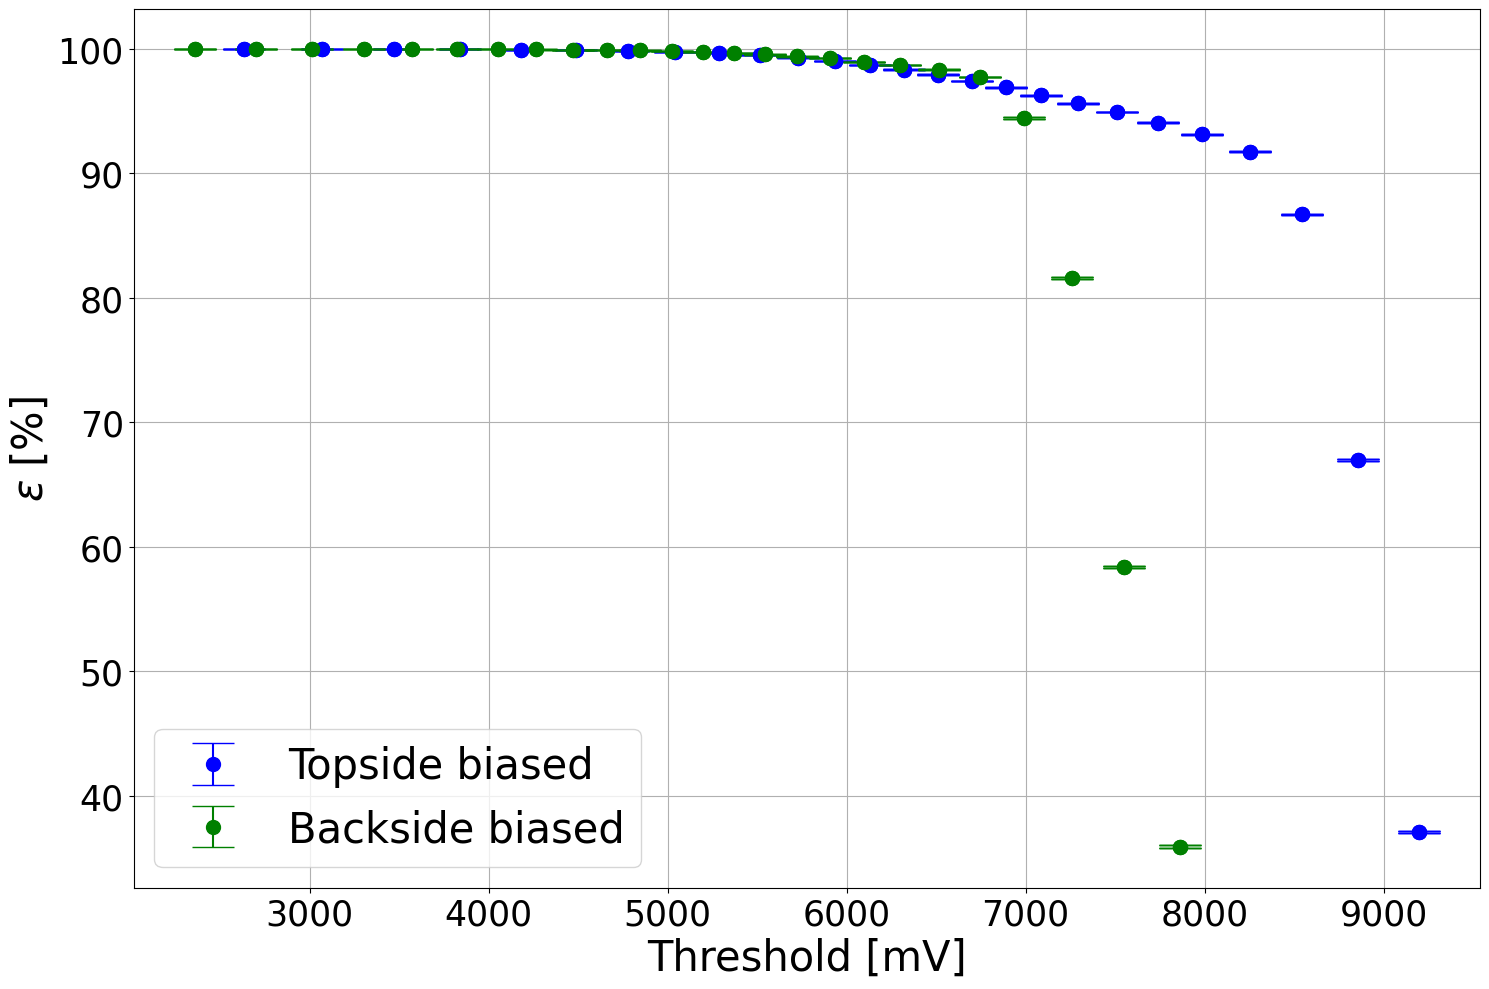

In [18]:
df = df_test
df = df.sort_values(by='Bias')


fig, ax1 = plt.subplots(1, 1, figsize=(15, 10))
#plt.title(plot_title, fontsize=(36))

df = df[df["Chip"]== name1] #Filter Data for first chip

# Create the efficiency plot with error bars
ax1.errorbar(df['Threshold'], df['Efficiency'], yerr=[df['Err-'], df['Err+']], fmt='.', color='blue', markersize=20, capsize=15, label=name1)
ax1.set_xlabel(x_label, fontsize=font_size)
ax1.set_ylabel(r'$\epsilon$ [%]', fontsize=font_size)
ax1.xaxis.set_tick_params(labelsize=25)
ax1.yaxis.set_tick_params(labelsize=25)

#ax1.tick_params(axis='y', colors='black')
#ax1.set_ylim(30,101)
#ax1.set_xlim(45,400)

ax1.grid(True)

# Annotate efficiency with Bias values
# for i, row in df.iterrows():
#     ax1.annotate(f'{row["Efficiency"]:.2f}', (row['Bias'], row['Efficiency']), textcoords="offset points", xytext=(5,5), ha='center')


df = df_test
df = df.sort_values(by='Bias')
df = df[df["Chip"]== name2]


# Create the efficiency plot with error bars
ax1.errorbar(df['Threshold'], df['Efficiency'], yerr=[df['Err-'], df['Err+']], fmt='.', color='green', markersize=20, capsize=15, label=name2)
#ax1.set_ylim(32,102)
ax1.grid(True)

plt.legend(fontsize=font_size, loc="lower left") #loc ="upper right"

#Create second x-axis
# if(second_x_axis == True):
#     ax3 = ax1.secondary_xaxis("top")
#     ax3.set_xticks(ax1.get_xticks())
#     ax3.set_xbound(ax1.get_xbound())
#     ax3.set_xticklabels([round((6.61133080e-06*np.power(x,3)-4.41590811e-03*np.power(x,2)+1.64285116e+00*x+8.25602665e+01)*2.8*6.242) for x in ax1.get_xticks()])
#     #ax3.set_xticklabels([round((x * 0.809 + 120.71)*2.8*6.242) for x in ax1.get_xticks()]) #linear fit
#     ax3.set_xlabel("Q [e]", fontsize=font_size)
#     ax3.xaxis.set_tick_params(labelsize=25)

fig.tight_layout()


# Show the plot
fig.savefig(output_file)
#fig.show()


In [19]:
x = 290
topside = (7.78662962e-06*np.power(x,3)-5.35376523e-03*np.power(x,2)+1.94368816e+00*x+1.13902162e+02)*2.8*6.242
backside = (6.61133080e-06*np.power(x,3)-4.41590811e-03*np.power(x,2)+1.64285116e+00*x+8.25602665e+01)*2.8*6.242
print(y)

9197.18108870244
